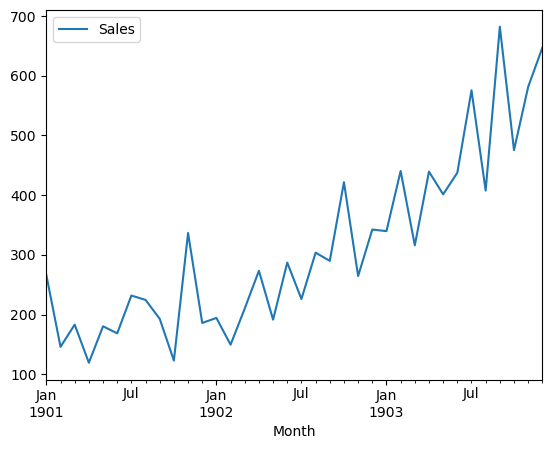

In [1]:
import pandas as pd
from matplotlib import pyplot

series = pd.read_csv('shampoo_sales.csv')
series.Month = '190' + series.Month
series.Month = pd.to_datetime(series.Month, format = '%Y-%m')
series.set_index('Month', inplace=True)
series.head()
series.plot()
pyplot.show()

In [3]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [2]:
#finding P using pacf plot
from statsmodels.graphics.tsaplots import plot_pacf

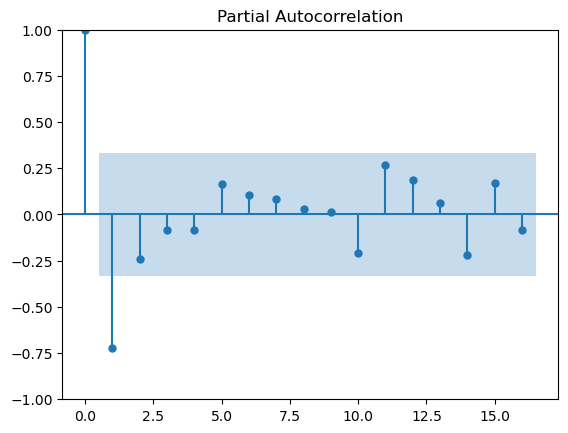

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series.Sales.diff().dropna());

In [6]:
series['Value'] = series.Sales.diff()
series.dropna(inplace = True)

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
##creating a function for values 
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", round(dftest[1],6))
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
       print("\t",key, ": ", val)
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

adf_test(series['Value']) 

1. ADF :  -7.249074055553857
2. P-Value :  0.0
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 33
5. Critical Values :
	 1% :  -3.6461350877925254
	 5% :  -2.954126991123355
	 10% :  -2.6159676124885216
Reject Ho - Time Series is Stationary


In [11]:
from statsmodels.graphics.tsaplots import plot_acf

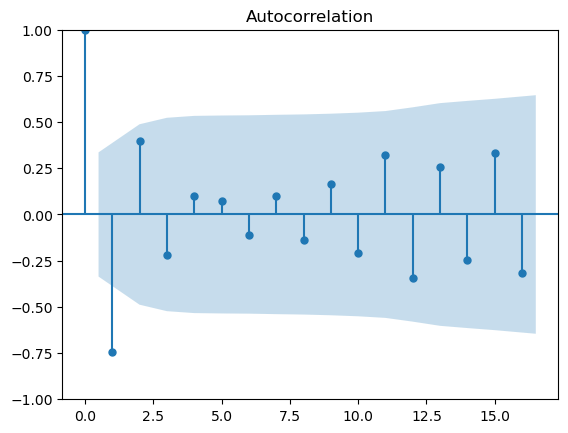

In [13]:
plot_acf(series.Sales.diff().dropna());

In [18]:
# !pip install pmdarima

In [17]:
from pmdarima.arima import auto_arima

In [21]:
model = auto_arima(series.Sales, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=387.783, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=418.150, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=393.068, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=394.655, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=416.790, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=389.277, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=389.136, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=394.574, Time=0.02 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.425 seconds
